# Getting Data
This dataset provides a unique resource for researchers and data scientists interested in the global dynamics of the COVID-19 pandemic. It focuses on the impact of different SARS-CoV-2 variants and mutations on the duration of local epidemics. By combining variant information with epidemiological data, this dataset allows for a comprehensive analysis of factors influencing the trajectory of the pandemic.


- Country: The country where the variant was detected.
- first_seq: Date of the first sequence detection for the variant.
- num_seqs: Number of sequences detected for the variant.
- last_seq: Date of the last sequence detection for the variant.
- variant: Name of the SARS-CoV-2 variant or mutation.
- censure_date: Date of right censoring for an epidemic.
- duration: Duration of the epidemic in days.
- censored: A boolean variable indicating whether the epidemic was censored.
- mortality_rate: Estimated mortality rate for the variant.
- growth_rate: A variable reflecting the rate of spread of the infection.
- contamination_rate: Percentage of countries where the variant was detected.

In [72]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

# Download latest version
path = kagglehub.dataset_download("lumierebatalong/covid-19-variants-survival-data")
path += "/surv_variants.csv"

print("Path to dataset files:", path)

Path to dataset files: /home/franio/.cache/kagglehub/datasets/lumierebatalong/covid-19-variants-survival-data/versions/1/surv_variants.csv


In [73]:
data = pd.read_csv(path)
data.dropna(inplace = True)
data

,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925
...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Trinidad and Tobago,2021-08-03,111,2021-10-19,21J.Delta,2022-04-03,77,True,0.029648,2108.573673,62.515014,196.332060
4107,Mali,2021-08-10,2,2021-08-11,21J.Delta,2022-04-10,1,True,0.036421,136.390698,4.967442,10.000000
4108,Kazakhstan,2021-08-17,88,2021-08-19,21J.Delta,2022-04-17,2,True,0.014838,52244.958678,775.206612,7722.500000
4110,Guyana,2021-09-06,18,2021-09-08,21J.Delta,2022-05-07,2,True,0.024429,3855.168000,94.176000,131.000000


# Data Exploration

## Countries by quantity of pandemics

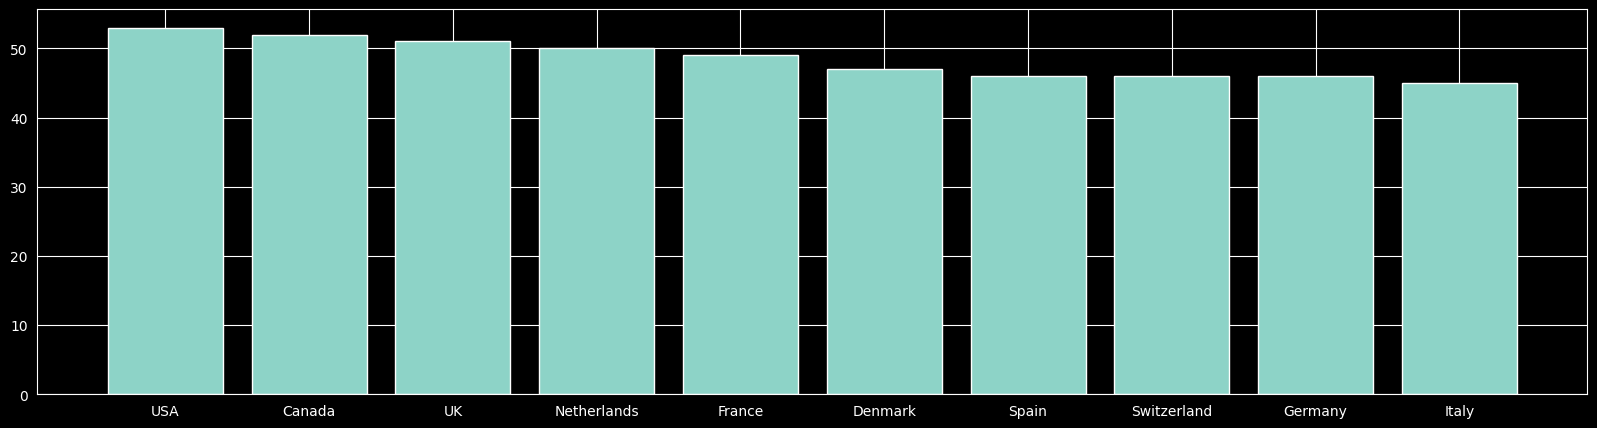

,Country,Pandemic_count
0,Afghanistan,10
1,Albania,10
2,Algeria,12
3,Andorra,14
4,Angola,26
...,...,...
166,Uzbekistan,5
167,Venezuela,13
168,Vietnam,13
169,Zambia,16


In [115]:
countries = np.unique(data['Country'])

df_cp = pd.DataFrame(
    {
        'Country' : countries,
        'Pandemic_count':  [data[data['Country'] == c].count()['Country'] for c in countries]
    }
)

top_10 = df_cp.sort_values(by='Pandemic_count', ascending=False).iloc[:10]

fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(top_10['Country'], top_10['Pandemic_count'])
plt.show()

df_cp

# Covid variant and mean mortality rate

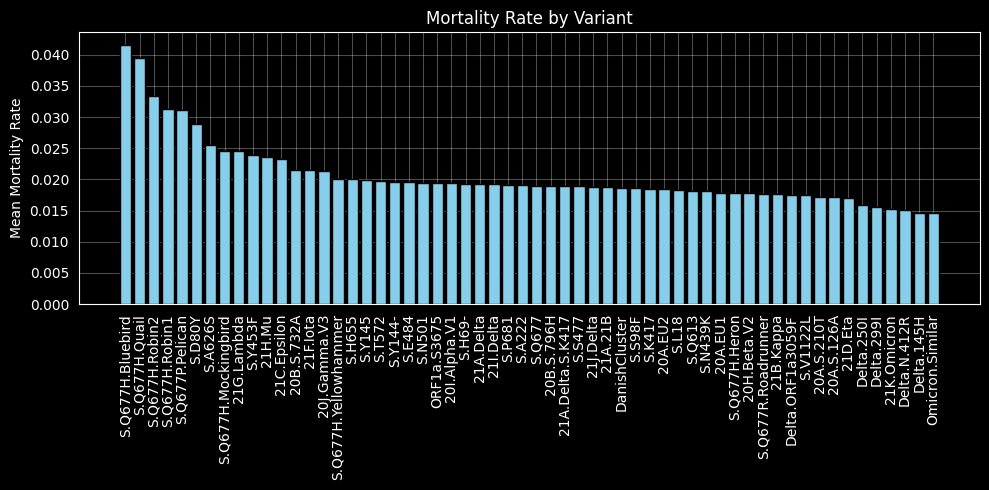

,variant,mortality_rate
42,S.Q677H.Bluebird,0.041513
45,S.Q677H.Quail,0.039448
47,S.Q677H.Robin2,0.033315
46,S.Q677H.Robin1,0.031305
49,S.Q677P.Pelican,0.031088
31,S.D80Y,0.028824
30,S.A626S,0.025500
44,S.Q677H.Mockingbird,0.024541
16,21G.Lambda,0.024485
57,S.Y453F,0.023994


In [122]:
variants = np.unique(data['variant'])
df_mr = pd.DataFrame({
    'variant' : variants,
    'mortality_rate': [data[data['variant'] == v]['mortality_rate'].mean() for v in variants]
})


df_mr = df_mr.sort_values(by='mortality_rate', ascending=False)


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_mr['variant'], df_mr['mortality_rate'], color='skyblue', edgecolor='black')
ax.grid(alpha=0.3)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Mean Mortality Rate')
ax.set_title('Mortality Rate by Variant')

plt.tight_layout()
plt.show()

df_mr